In this data set we have the data of Telccom Customers.Based on the dataset we will use machine learning to predict who will leave or who will stay,Predicting the churn could be useful for a company to do targeted marketing to ensure that customers dont leave the company.This kernel is work in process.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


### Importing Python Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [3]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploring the Data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
df.SeniorCitizen.unique()

array([0, 1])

In [6]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [7]:
len(df.MonthlyCharges.unique())

1585

In [8]:
# Summary of Dataset 
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 7043
Columns  : 21

Features :
     : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values    : 0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [9]:
df["Churn"].value_counts(sort = False)

No     5174
Yes    1869
Name: Churn, dtype: int64

As expected this is not a balanced data.We have less customer churn compared to retebtion.

In [10]:
# Creating a copy of the data 
df_copy = df.copy()

In case we want to see the real data it good to have a back up if the data with us.

In [11]:
df_copy.drop(['customerID','MonthlyCharges','TotalCharges','tenure'],axis=1,inplace = True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


#### Summarizing the Churn Data

In [12]:
summary = pd.concat([pd.crosstab(df_copy[x],df_copy.Churn) for x in df_copy.columns[:-1]], keys= df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

From the above table we can see the inlfuence of each categorical variable on the customer churn from the telecon company.

#### Lets gets percentage summary

In [13]:
summary['Churn_Percentage'] = summary['Yes']*100/(summary['No'] + summary['Yes'])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939         26.920872
                 Male                       2625   930         26.160338
SeniorCitizen    0                          4508  1393         23.606168
                 1                           666   476         41.681261
Partner          No                         2441  1200         32.957979
                 Yes                        2733   669         19.664903
Dependents       No                         3390  1543         31.279140
                 Yes                        1784   326         15.450237
PhoneService     No                          512   170         24.926686
                 Yes                        4662  1699         26.709637
MultipleLines    No                         2541   849         25.044248
                 No phone service            512   170         24.926686
                 Yes                        2121   850         28.609896
InternetService  DSL                        1962   459         18.959108
                 Fiber optic                1799  1297         41.892765
                 No                         1413   113          7.404980
OnlineSecurity   No                         2037  1461         41.766724
                 No internet service        1413   113          7.404980
                 Yes                        1724   295         14.611194
OnlineBackup     No                         1855  1233         39.928756
                 No internet service        1413   113          7.404980
                 Yes                        1906   523         21.531494
DeviceProtection No                         1884  1211         39.127625
                 No internet service        1413   113          7.404980
                 Yes                        1877   545         22.502064
TechSupport      No                         2027  1446         41.635474
                 No internet service        1413   113          7.404980
                 Yes                        1734   310         15.166341
StreamingTV      No                         1868   942         33.523132
                 No internet service        1413   113          7.404980
                 Yes                        1893   814         30.070188
StreamingMovies  No                         1847   938         33.680431
                 No internet service        1413   113          7.404980
                 Yes                        1914   818         29.941435
Contract         Month-to-month             2220  1655         42.709677
                 One year                   1307   166         11.269518
                 Two year                   1647    48          2.831858
PaperlessBilling No                         2403   469         16.330084
                 Yes                        2771  1400         33.565092
PaymentMethod    Bank transfer (automatic)  1286   258         16.709845
                 Credit card (automatic)    1290   232         15.243101
                 Electronic check           1294  1071         45.285412
                 Mailed check               1304   308         19.106700

Looking at the percentage churn we can take decision on where to focus to prevent or reduce the churn of customers.

## Vizualizing the data

### Churn Percentage

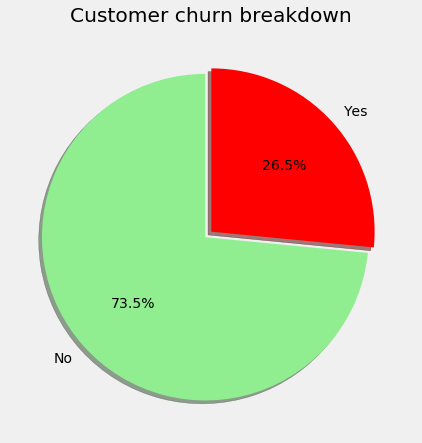

In [14]:
from pylab import rcParams # For customizing the plots

# Data to plot
labels = df['Churn'].value_counts(sort= True).index
sizes = df['Churn'].value_counts(sort = True)

colors = ["lightgreen","red"]
explode = (0.05,0)  # explode first slize

rcParams['figure.figsize'] = 7,7

#plot
plt.pie(sizes, explode = explode,labels = labels,colors=colors,autopct='%1.1f%%',shadow = True,startangle=90)

plt.title('Customer churn breakdown')
plt.show()

### Effect of Monthly Charges on Churn

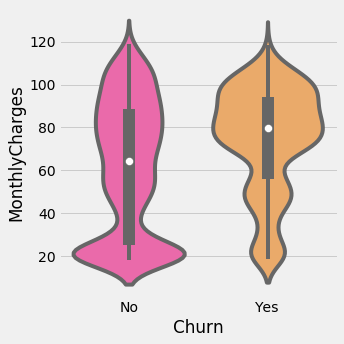

In [15]:
g = sns.factorplot(x='Churn',y="MonthlyCharges",data=df,kind="violin",palette="spring")

We can very clearly see that the customers who have churned the most pay high monthy charges.So we need to pay more attention to high paying customers to reduce churn.

### Effect of tenure on Churn

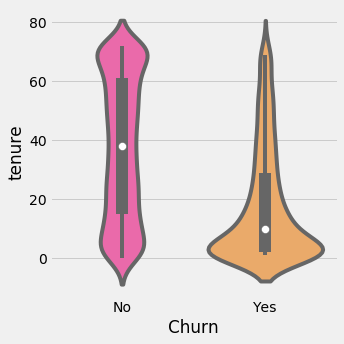

In [16]:
g = sns.factorplot(x='Churn',y="tenure",data=df,kind="violin",palette="spring")

We can very clearly see that churn is higher when the customer is new.So we have to take care during initial tenure to see that the churn is low.

### Preparing the data for Machine Learning Classifier

In [17]:
# Removing blank space in our date 
len(df[df["TotalCharges"] == ""])
df = df[df["TotalCharges"] != " "]

In [18]:
# Dropping missing values

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns 
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

#Columns more than 2 values 
multi_cols = [i for i in cat_cols if i not in bin_cols]       

#Label encoding Binary columns 
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])

#Duplicating columns for multi value columns
df = pd.get_dummies(data = df ,columns = multi_cols)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [19]:
len(df.columns)

42

In [20]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [21]:
# Scaling Numerical columns 
std = StandardScaler()

# Scale data
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns= num_cols)

#dropping original values merging scaled values for numerical values 
df_telecom_og = df.copy()
df = df.drop(columns = num_cols,axis =1)
df = df.merge(scaled,left_index = True,right_index=True,how='left')

#df.info()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


So now with the above lines of code we have managed to scale the numerical values and keep the encoded features as it is.To see the effect of scalling check to the right sode of our dataframe

In [22]:
df.drop(["customerID"],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [23]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,0,0,1,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,NaN,NaN,NaN


In [24]:
df = df.dropna()

In [25]:
# Double check that nulls been removed 
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


### Modelling

In [26]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = df.drop(['Churn'],axis=1).values

# We have to get the matrix of target variables
y = df["Churn"].values

In [27]:
# Spliting the dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [28]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.280248,-0.654777,-0.987466
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.995040,-1.484126,-0.938428
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.280248,-1.374433,-0.997018
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.954296,0.497004,-0.668046
4,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.186535,-1.502408,-0.686267


In [29]:
type(X_train)

numpy.ndarray

In [30]:
print(len(df.columns))
df.columns

41


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
score = model.score(X_test,y_test)

print("Accuracy =" + str(score))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


Accuracy =0.7906976744186046
[[1376  185]
 [ 256  290]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1561
           1       0.61      0.53      0.57       546

    accuracy                           0.79      2107
   macro avg       0.73      0.71      0.71      2107
weighted avg       0.78      0.79      0.79      2107



### Feature importance using Logistic Regression

In [32]:
# We will be trying the find the parameters which are most important for our prediction
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.02968453796885491, 0.12479933303219135, 0.2820663377897542, 0.08493321756233786, 0.12344348868106678, 0.32102018245811187, 0.0935700046993301, 0.12487655883864224, 0.02987348398181919, 0.379854021636976, 0.4513840686795729, 0.07009697688513038, 0.3457739798324604, 0.07009697688513038, 0.2742439327898516, 0.21238591002629334, 0.07009697688513038, 0.14085586298365568, 0.06321084961149534, 0.07009697688512351, 0.008319197431124633, 0.23530821179258504, 0.07009697688513038, 0.16377816474986354, 0.040469711693172816, 0.07009697688513038, 0.11199975873574157, 0.0391029596490531, 0.07009697688512351, 0.11063300669167063, 1.1286694581894257, 0.01429982387308178, 1.1129365641588462, 0.14750115609184752, 0.248394530837453, 0.3225806855906694, 0.07474807149613863, 0.03777498746839263, 0.05942269719175671, 0.10125803879744093]


In [33]:
# Finding and deleting the label columns
cols = list(df.columns)
cols.index("Churn")

6

In [34]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [35]:
# Sorting on Feature Importance 
sorted_index = sorted(range(len(coef)),key = lambda k:coef[k],reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
InternetService_DSL
OnlineSecurity_No
PaymentMethod_Electronic check
PaperlessBilling
Partner
OnlineSecurity_Yes
PaymentMethod_Credit card (automatic)
TechSupport_No
OnlineBackup_No
TechSupport_Yes
PaymentMethod_Bank transfer (automatic)
OnlineBackup_Yes
MultipleLines_No phone service
SeniorCitizen
PhoneService
StreamingTV_Yes
StreamingMovies_Yes
TotalCharges
MultipleLines_No
Dependents
PaymentMethod_Mailed check
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
TechSupport_No internet service
StreamingTV_No internet service
DeviceProtection_No internet service
StreamingMovies_No internet service
DeviceProtection_No
MonthlyCharges
StreamingTV_No
StreamingMovies_No
tenure
MultipleLines_Yes
gender
Contract_One year
DeviceProtection_Yes


Above mentioned features are as per their importance to predict the churn.

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

predictions = model_rf.predict(X_test)
score = model.score(X_test,y_test)

print("Accuracy =" + str(score))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


Accuracy =0.7906976744186046
[[1368  193]
 [ 303  243]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1561
           1       0.56      0.45      0.49       546

    accuracy                           0.76      2107
   macro avg       0.69      0.66      0.67      2107
weighted avg       0.75      0.76      0.76      2107



We dont get much change in accuracy for Random Forest and Logistic Regression,We also need to consider the Precision and Recall Values to have more accurate idea of the model.For the case of Churn our models are not Performing well.This will need feature engineering and fine tuning of the model to improve the model Performance

### Saving the Model

In [37]:
import pickle 

#Save
with open('model.pkl','wb') as f:
    pickle.dump(model_rf,f)
    
#Load 
with open('model.pkl','rb') as f:
    loaded_model_rf = pickle.load(f)